# Autores:  Douglas Silva Ferreira e  Luiz Augusto Facury


In [1]:
import random as rd
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot as plt


# Gera uma população inicial

In [2]:
#Define parametros para algoritmo evolutivo
crossover_rate = 1
mutation_rate = 0.8 
tamanho_populacao = 20
tamanhoxadrez = 8

#Gera população inicial 
def init_population(_mu:int = 20, n:int = 8):
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

pop = init_population(tamanho_populacao, tamanhoxadrez)



# Retorna quantidade de xeques de cada permutação


In [3]:
def fitness_nq(solution):
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques

# Cinco indivíduos aleatórios da população são sorteados  e os dois melhores são escolhidos comos os pais que farão o cruzamento

In [4]:
def pais(population):
  #seleciona 5 aleatoriamente e pega os 2 melhores dentre os 5
  listaaleatoria = list(range(1,tamanho_populacao)) 
  rd.shuffle(listaaleatoria)
  cincoaleatorios = []
  for i in range(5):
    cincoaleatorios.append(population[listaaleatoria[i]]) 

  valoresxeques = []
  for i in range(5):
    valoresxeques.append(fitness_nq(cincoaleatorios[i]))

  #Retorna os índices dos dois melhores individuos, que serão os pais
  K = 2
  doismelhores = sorted(range(len(valoresxeques)), key = lambda sub: valoresxeques[sub])[:K]
  pai1, pai2 = cincoaleatorios[doismelhores[0]], cincoaleatorios[doismelhores[1]] 
  #a = [fitness_nq(each_solution) for each_solution in cincoaleatorios]
  return pai1, pai2

# Função que faz o cruzamento entre os dois melhores pais e gera dois novos filhos, que posteriormente sofrem mutações



In [5]:
def cruzamentoemutacao(pai1, pai2):

  #Crossover com probabilidade 1
  posicaocorte = math.ceil(tamanhoxadrez/3);
  parte1filho1 = pai1[0:posicaocorte]
  parte1filho2 = pai2[0:posicaocorte]
  parte2filho1 = pai1[posicaocorte:tamanhoxadrez]
  rd.shuffle(parte2filho1)
  parte2filho2 = pai2[posicaocorte:tamanhoxadrez]
  rd.shuffle(parte2filho2)
  filho1= parte1filho1+parte2filho1
  filho2= parte1filho2+parte2filho2

  #Mutação ocorre com probabilidade de 80%
  if(rd.random()<0.8):
    posicoesaleat = rd.sample(range(0, 7), 2)
    aux = filho1[posicoesaleat[0]] 
    filho1[posicoesaleat[0]] = filho1[posicoesaleat[1]]
    filho1[posicoesaleat[1]] = aux;    
    aux2 = filho2[posicoesaleat[0]] 
    filho2[posicoesaleat[0]] = filho2[posicoesaleat[1]]
    filho2[posicoesaleat[1]] = aux2;  
  return filho1, filho2


# Retorna o indíce do pior indíviduo da populaçao.

In [6]:
def remocao (population):
  aux2 = 0
  max = 0
  for x in range (len(population)):
    aux=fitness_nq(population[x])
 
    if (aux >= max):
      max=aux
      aux2=x
  return aux2

#  Função principal(evolução) simula a evolução dos indivíduos até que as condições de parada sejam atingidas.

In [7]:
def evolucao (n:int=8, pop:int=20, interacoes:int=1000):
  pop = init_population(20, 8) #inicializa a pop
  pop_fitness = [fitness_nq(each_solution) for each_solution in pop]  #fitness dos individuos
  media = [np.mean(pop_fitness)] #media do fitness
  minimo = [min(pop_fitness)] #menor fitness
  aux = 0
  while min(pop_fitness)!=0 or aux < interacoes:  #condicao de parada
    pai1, pai2 = pais(pop) #escolhe os pais
    filho1, filho2 = cruzamentoemutacao(pai1, pai2) #gera os filhos dos pais
    pop.append(filho1) #adiciona os filhos a pop
    pop.append(filho2)
    aux2 = remocao(pop)
    pop.pop(aux2)  #remove primeiro individuo
    aux2 = remocao(pop)
    pop.pop(aux2)  #remove segundo individuo
    pop_fitness = [fitness_nq(each_solution) for each_solution in pop] 
    aux+=1
    minimo.append(min(pop_fitness))
    media.append(np.mean(pop_fitness))
  return pop, minimo, media

In [8]:
def plotar(valores, minimos, medias):
 
    interacoes = range(len(minimos))
 
    fig, ax = plt.subplots( dpi=120 )
    ax.plot(interacoes, minimos, 'y.', label='Melhor')
    ax.plot(interacoes, medias, 'k.', label='Média')
    ax.set_xlabel('gerações')
    ax.set_ylabel('xeques')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('N raínhas.\nNº de xeques em cada geração.') 
    plt.show()

# Resultado para 8 rainhas e 20 indivíduos(padrão)

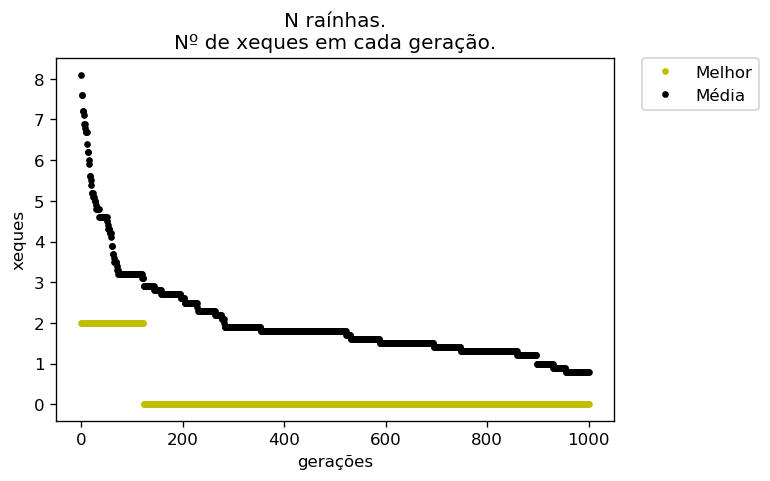

In [9]:
pop, minimo, media = evolucao()
plotar(pop, minimo, media)

# Resultado para 20 rainhas e 50 indivíduos e 5000 iterações

```
# Isto está formatado como código
```

 

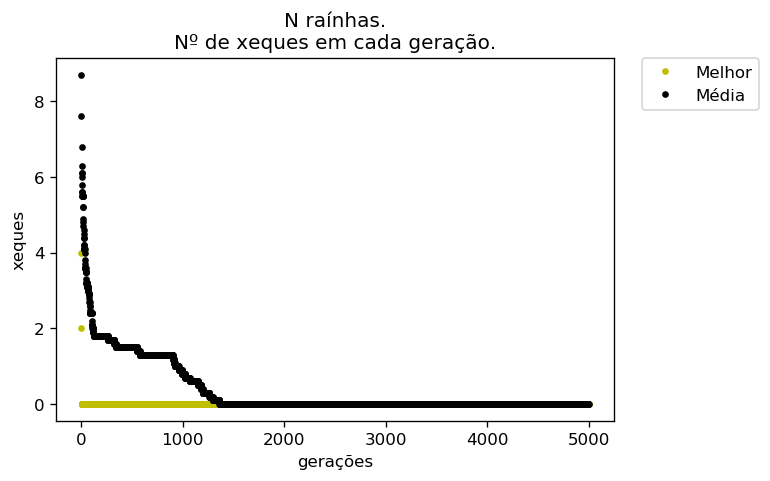

In [10]:
pop, minimo, media = evolucao(20, 50,5000)
plotar(pop, minimo, media)

# Resultado para 50 rainhas e 120 indivíduos e 10000 iterações


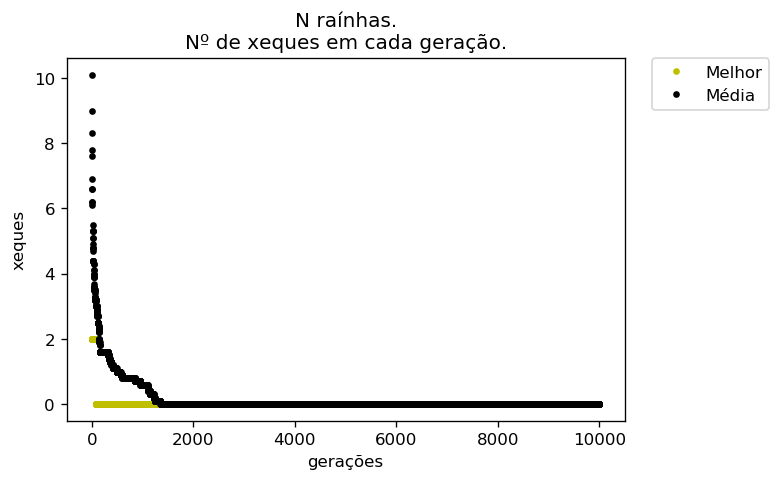

In [11]:
pop, minimo, media = evolucao(50, 120,10000)
plotar(pop, minimo, media)